## Final Project Submission

Please fill out:
* Student name: Karl Van Burkleo
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


# Analysis of movie industry

## Introduction

My employer (Microsoft) decided to make a new movie studio without knowing anything about creating movies. They have hired me to help them understand the movie industry and related pros and cons. I am in charge of doing data analysis and presenting what type of movies are doing the best last 10 years.

### Goals

In this project the datasets from IMDB used to explore and understand what type of movies are doing the best in recent years.
With provided data we can answer to following questions:

1. What is the best month to release movies?
2. Which month of the year is more profitable?
3. Which production budget ranges yield the most profitable movies?
   Is higher production budgets more profitable than movies with lower production budgets?
   How much to spend on the movie?
4. What is the runtime minutes and genre of highly rated movies and which genres are most profitable recently?
5. Which directors are making the most profitable movies?


### Importing the Data

#The first step is to import any necessary libraries as shown below.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql
from pandasql import sqldf
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# The next few lines of code im going to check the movie data to see what info I'm working with for Box Office, IMDB, and TMDB
# I am also making Data Frames from the .csvs


In [116]:
df_gross=pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
df_gross.info()
#checking the csv for what it contains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [117]:
df_crew=pd.read_csv('./zippedData/imdb.title.crew.csv.gz')
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [118]:
df_title=pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [119]:
df_names=pd.read_csv('./zippedData/imdb.name.basics.csv.gz')
df_names.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [120]:
df_akas=pd.read_csv('./zippedData/imdb.title.akas.csv.gz')
df_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [121]:
df_principals=pd.read_csv('./zippedData/imdb.title.principals.csv.gz')
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [122]:
df_ratings=pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [123]:
df_info=pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter='\t',encoding='utf-8')
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [124]:
df_reviews=pd.read_csv('./zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='latin1')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [125]:
df_popularity=pd.read_csv('./zippedData/tmdb.movies.csv.gz')
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [126]:
df_budget=pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# <font color='Orange'>➤</font> Question 1 
## What is the best month to release movies?

In [127]:
#checking to see overall data for any correlation
df_popularity.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [128]:
#dropping the unnecessary "unnamed" column
df_popularity= df_popularity.drop(df_popularity.columns[0], axis=1)

In [129]:
#always check for null values!
df_popularity.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [130]:
#lets deal with the duplicated data

duplicated = df_popularity[df_popularity.duplicated(subset=['id',
                                                      'original_language'])]
print(len(duplicated))
duplicated.head(10)

1020


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
2803,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210
2919,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16
2946,"[28, 18, 53]",56812,es,Balada triste de trompeta,5.552,2011-08-19,The Last Circus,6.7,177
3030,"[53, 18, 10749, 80]",47261,es,Carancho,4.554,2011-02-11,Carancho,6.6,59
3184,"[10749, 35, 18]",70588,en,The Myth of the American Sleepover,3.066,2011-07-22,The Myth of the American Sleepover,6.2,47


In [131]:
# Dropping the duplicated rows and checking for duplicates again
df_popularity = df_popularity[~df_popularity.duplicated(subset=['id'], keep='first')]
df_popularity[df_popularity.duplicated(subset='id')]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


In [132]:
#Checking to see the types of the columns and the release_date is an object
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            25497 non-null object
id                   25497 non-null int64
original_language    25497 non-null object
original_title       25497 non-null object
popularity           25497 non-null float64
release_date         25497 non-null object
title                25497 non-null object
vote_average         25497 non-null float64
vote_count           25497 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [133]:
# Changing Release date column type to datetime
df_popularity['release_date'] = pd.to_datetime(df_popularity['release_date'], 
                                        format='%Y-%m-%d', errors='coerce')
df_popularity['release_date'].dtype

dtype('<M8[ns]')

In [134]:
# Checking if there are any null values that showed up from errors.
df_popularity['release_date'].isnull().sum()

0

In [135]:
# Created new columns of year and month to see a trend when movies are released.
df_popularity['release_year'] = df_popularity['release_date'].dt.year
df_popularity['release_month'] = df_popularity['release_date'].dt.month
    
df_popularity.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7


In [136]:
#It is clear that the number of movies increases after 2009.
df_popularity['release_year'].value_counts()[:15]

2015    3066
2013    3066
2014    3052
2016    2970
2017    2921
2011    2645
2012    2615
2018    2496
2010    2393
2019      63
2009      39
2008      13
2004      10
2005       9
2006       9
Name: release_year, dtype: int64

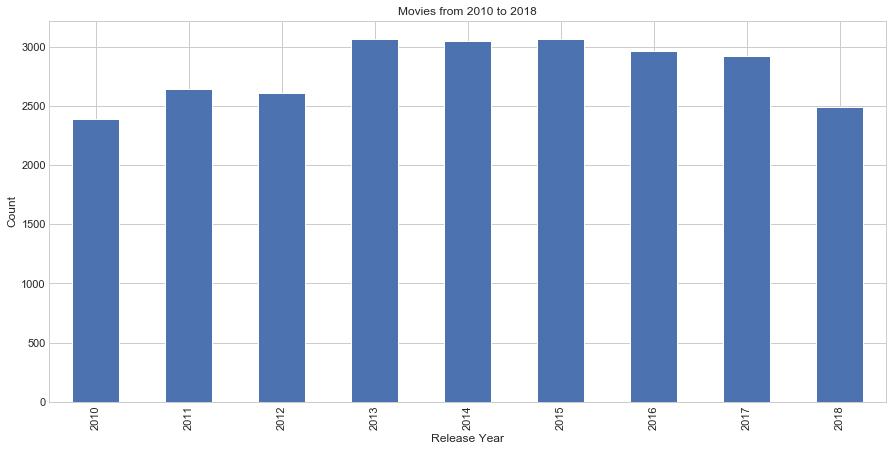

In [137]:
# Showing Distribution of movies by years 
# Since movies after 2009 have lots more data I will show from dates 2009 to 2018 because its the last year of full data

fig, ax = plt.subplots(figsize=(15,7))
df_popularity[(df_popularity["release_year"] >= 2010) & 
              (df_popularity["release_year"] < 2019)].groupby(
    "release_year")["id"].count().plot.bar(ax=ax)
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.set_title('Movies from 2010 to 2018')
plt.savefig('Movies_Released_from_10-18.png')
plt.show()   

## We can see that number of released movies increased after 2009 and years 2013, 2014 and 2015 have the highest number of movies.

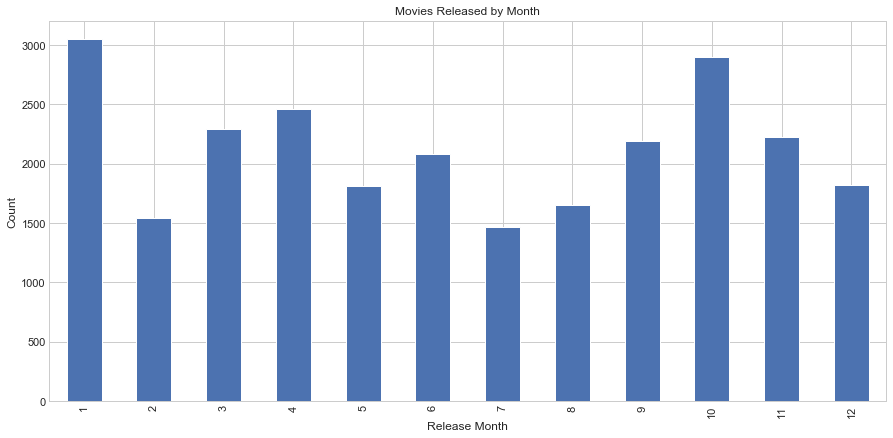

In [138]:
# Showing distribution of movies by months

fig, ax = plt.subplots(figsize=(15,7))
df_popularity.groupby('release_month')['id'].count().plot.bar()
ax.set_xlabel('Release Month')
ax.set_ylabel('Count')
ax.set_title('Movies Released by Month')
plt.savefig('Movie_released_month.png')
plt.show()

### Above we see that movies are mostly released in January and October. 
### July is the month which least number of movies.
### I would suggest releasing a movie in the dryer months so there is not a lot of competition

# <font color='Orange'>➤</font> Question 2

## Which month of the year is more profitable?

An important part of this project for stakeholders is to find production budget and expected ROI. Having a tangible figure of when to release will be appreciated to the layman.

In [139]:
#checking the dataframe
# most of the columns are objects
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [140]:
df_budget = df_budget[~df_budget.duplicated(subset=['movie'], 
                                               keep='first')].copy(deep=True)
#removing duplicates

In [141]:
#checking how the columns look and as we can see some contain additional $ sign
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [142]:
# Changed the type of release_date column from object to a datetime 
# Added new columns called "release year" and "release month"
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'], 
                                        format='%b %d, %Y', errors='coerce')
df_budget['release_year'] = df_budget['release_date'].dt.year
df_budget['release_month'] = df_budget['release_date'].dt.month
# checking for new columns
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12


In [143]:
#removing the '$' sign, comas and changing the datatype changing the datatype 
#to float
df_budget['domestic_gross']=df_budget['domestic_gross'].str.replace("$","").str.replace(",","").astype('float')

In [144]:
df_budget['worldwide_gross']=df_budget['worldwide_gross'].str.replace("$","").str.replace(",","").astype('float')

In [145]:
df_budget['production_budget']=df_budget['production_budget'].str.replace("$","").str.replace(",","").astype('float')

In [146]:
#making sure changes are done
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 8 columns):
id                   5698 non-null int64
release_date         5698 non-null datetime64[ns]
movie                5698 non-null object
production_budget    5698 non-null float64
domestic_gross       5698 non-null float64
worldwide_gross      5698 non-null float64
release_year         5698 non-null int64
release_month        5698 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 400.6+ KB


In [147]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12


Each stockholder would like to see return on investment(ROI). <br/>
The formula ROI = (gain from investment — cost of investment) / cost of investment. <br/>
New columns Domestic and Worldwide ROI are added to our dataframe.

In [148]:
#computing ROI
df_budget['ROI_worldwide'] = (df_budget['worldwide_gross'] - 
            df_budget['production_budget']) / df_budget['production_budget']
df_budget['ROI_domestic'] = (df_budget['domestic_gross'] - 
            df_budget['production_budget']) / df_budget['production_budget']
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 10 columns):
id                   5698 non-null int64
release_date         5698 non-null datetime64[ns]
movie                5698 non-null object
production_budget    5698 non-null float64
domestic_gross       5698 non-null float64
worldwide_gross      5698 non-null float64
release_year         5698 non-null int64
release_month        5698 non-null int64
ROI_worldwide        5698 non-null float64
ROI_domestic         5698 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 489.7+ KB


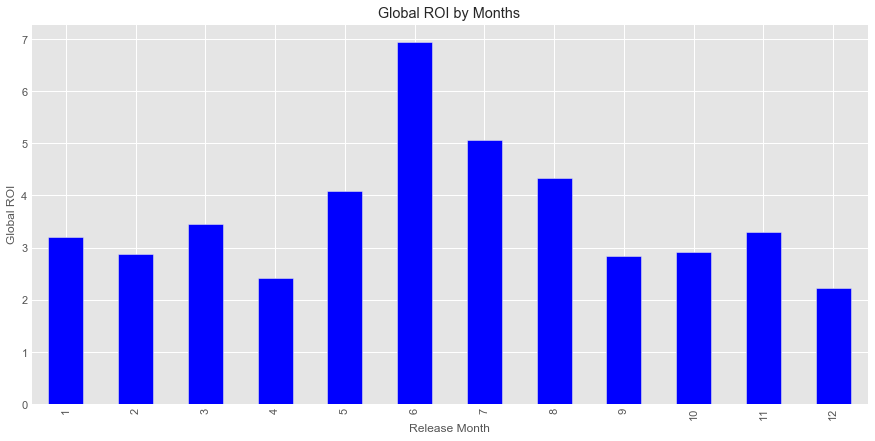

In [149]:
#showing the results with bar plot to see which months were most profitable
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,7))
df_budget.groupby('release_month')['ROI_worldwide'].mean().plot.bar(
    color=['blue'])
ax.set_ylabel('Global ROI')
ax.set_xlabel('Release Month')
ax.set_title('Global ROI by Months')
plt.savefig('Worldwide_ROI_Month.png')
plt.show()

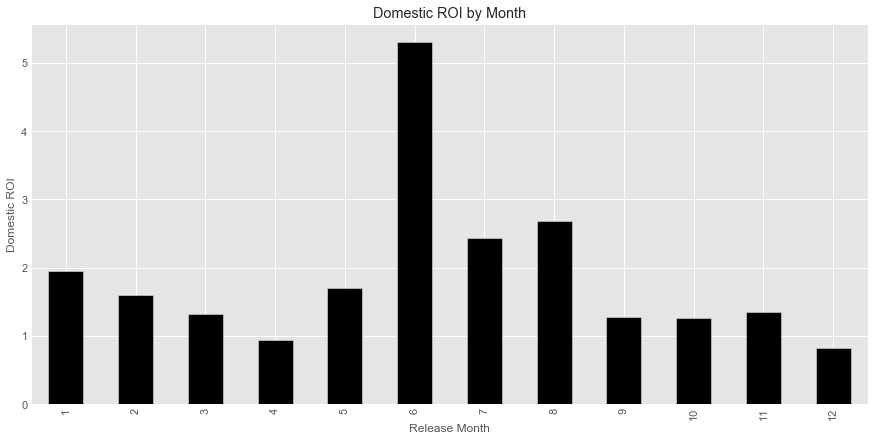

In [150]:
fig, ax = plt.subplots(figsize=(15,7))
df_budget.groupby('release_month')['ROI_domestic'].mean().plot.bar(
    color=['black'])
ax.set_ylabel('Domestic ROI')
ax.set_xlabel('Release Month')
ax.set_title('Domestic ROI by Month')
plt.savefig('Domestic_ROI_Month.png')
plt.show()

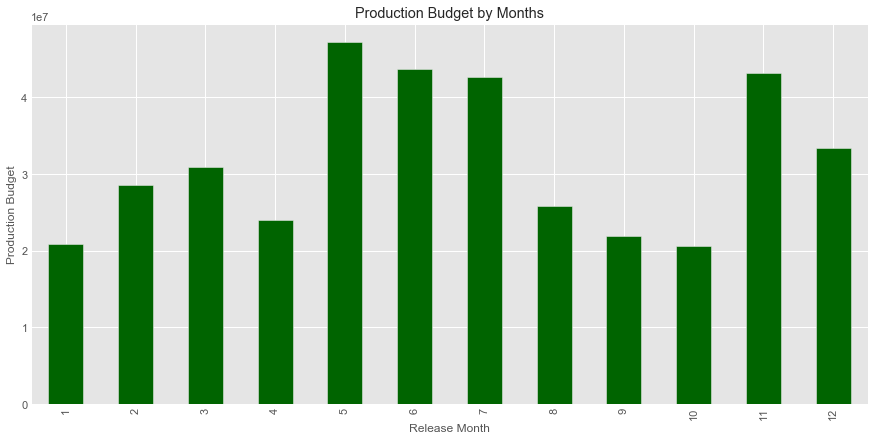

In [151]:
# Production Budget by Months
fig, ax = plt.subplots(figsize=(15,7))
df_budget.groupby('release_month')['production_budget'].mean().plot.bar(
                                                            color=['darkgreen'])
ax.set_ylabel('Production Budget')
ax.set_xlabel('Release Month')
ax.set_title('Production Budget by Months')
plt.savefig('Production_Budget_Month.png')
plt.show()

Production budget in month shows that May and June have largest budgets. Which makes sense because most huge Blockbusters come out in beginning of summer after school is out.

We can tell that according to dataset the top 3 months with highest average ROI are June, July and August. So if you want to release movie consider summer months. 
Top 4 months with highest average production budget are May, June, July and November.

# <font color='Orange'>➤</font>  Question 3
## What is the most efficient production budget?

In [152]:
#computing the net income since the first question comes is to know how much
#net money we will get in case we spent x amount
df_budget['net_income']=(df_budget['domestic_gross']+
            df_budget['worldwide_gross'])- df_budget['production_budget']

In [153]:
# checking for outliers
df_budget['net_income'].describe()

count    5.698000e+03
mean     1.018014e+08
std      2.114872e+08
min     -1.574753e+08
25%     -3.443462e+05
50%      2.478578e+07
75%      1.111782e+08
max      3.111853e+09
Name: net_income, dtype: float64

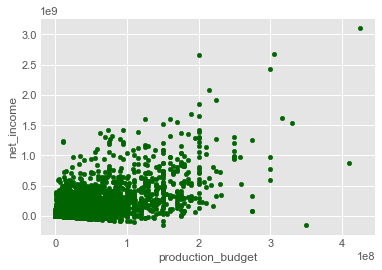

In [154]:
#making scatter plot which shows positive connection between production 
#budget and net income.
df_budget.plot.scatter(x='production_budget',
                      c='darkgreen',
                      y='net_income',)
plt.savefig('Production_Budget_Scatter.png')

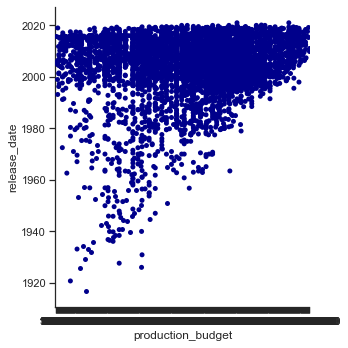

In [155]:
#showing connection between release date and production budget
#Huge spike in production budget after the year 2000
sns.set(style="ticks")
sns.catplot(y ="release_date", x ="production_budget", data=df_budget, 
                                                            color='darkblue')
plt.savefig('Release_Date_Production_Budget.png')

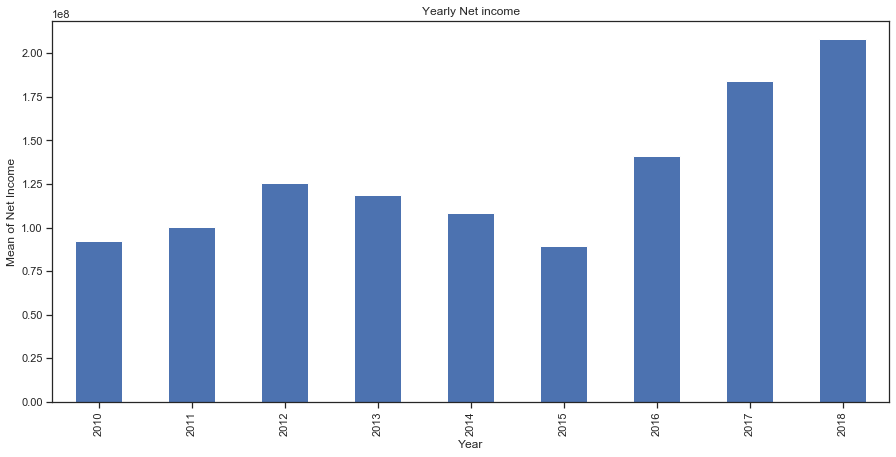

In [156]:
# showing the change of net income per year
# with the exception of 2015, there is a steady upwards trend of growth
fig, ax = plt.subplots(figsize=(15,7))
df_budget[(df_budget["release_year"] >= 2010) & 
           (df_budget["release_year"] <2019)].groupby('release_year')['net_income'].mean().plot.bar()
ax.set_ylabel('Mean of Net Income')
ax.set_xlabel('Year')
ax.set_title('Yearly Net income')

plt.savefig('Yearly_Net_Income.png')

plt.show()

Comparing budgets with ranges

In [157]:
#defining a function for different ranges
def product_budg_range(production_budget):
    if production_budget < 5000000:
        return "< $5M"
    elif 5000000 <= production_budget <= 10000000:
        return "$5-10M"
    elif 10000000 <= production_budget <= 20000000:
        return "$10-20M"
    elif 2000000 <= production_budget <= 30000000:
        return "$20-30M"
    elif 3000000 <= production_budget <= 40000000:
        return "$30-40M"
    elif 40000000 <= production_budget <= 50000000:
        return "$40-50M"
    elif 50000000 < production_budget <= 60000000:
        return "$50-60M"
    elif 60000000 < production_budget <= 70000000:
        return "$60-70M"
    elif 70000000 <= production_budget <= 80000000:
        return "$70-80M"
    elif 80000000 < production_budget <= 90000000:
        return "$80-90M"
    elif 90000000 < production_budget <= 1000000000:
        return "$90-100M"
    
    else:
        return "> $100M"

In [158]:
#creating a new column to connect each movie with it's production budget range.

df_budget['PB_ranges'] = df_budget['production_budget'].apply(product_budg_range)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI_worldwide,ROI_domestic,net_income,PB_ranges
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,5.532577,0.789430,3.111853e+09,$90-100M
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,1.546673,-0.412899,8.761278e+08,$90-100M
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,-0.572108,-0.877822,-1.574753e+08,$90-100M
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,3.243841,0.388403,1.531420e+09,$90-100M
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,3.153696,0.956408,1.619903e+09,$90-100M


In [159]:
#creating a column which tells if the movie made a profit!

df_budget['profitable'] = df_budget['net_income'].apply(lambda x: "Yes" if x>1 else "No")
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 13 columns):
id                   5698 non-null int64
release_date         5698 non-null datetime64[ns]
movie                5698 non-null object
production_budget    5698 non-null float64
domestic_gross       5698 non-null float64
worldwide_gross      5698 non-null float64
release_year         5698 non-null int64
release_month        5698 non-null int64
ROI_worldwide        5698 non-null float64
ROI_domestic         5698 non-null float64
net_income           5698 non-null float64
PB_ranges            5698 non-null object
profitable           5698 non-null object
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 783.2+ KB


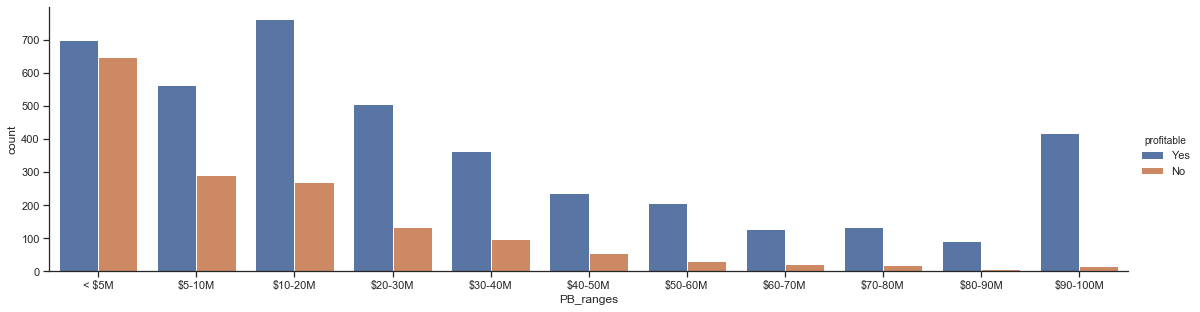

In [160]:
# It looks like in general, the more you spend on a movie, the more profitable it will be!
order= ["< $5M", "$5-10M", "$10-20M", "$20-30M",
        "$30-40M","$40-50M","$50-60M","$60-70M",
        "$70-80M","$80-90M","$90-100M"]
sns.catplot(x='PB_ranges',
                data=df_budget,
                kind="count", hue='profitable', height=4.5, aspect=3.5, order=order)
plt.savefig('Range_of_Production_Budgets.png')

We can see that in general, higher production budget lead to higher profit. Gotta spend money to make money I guess!

# <font color='Orange'>➤</font> Question 4
## What is the most efficient runtime and genre of highly rated movies?
## What genre is profitable?

In [161]:
#This dataframe has the genres column in it
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [162]:
#renaming this column, and merging it with other data
df_title_rename = df_title.rename(columns={"original_title": "title"})

In [163]:
#checking whether changes are done
df_title_rename.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
title              146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [164]:

# merging financial data with genres
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [165]:
#dropping null values
df_gross_nonna = df_gross.dropna()
df_title_rename_na= df_title_rename.dropna()

In [166]:
#merging both dataframes using inner join
merged_genres_income = pd.merge(df_gross_nonna, df_title_rename_na, how='inner', 
                                                            on= 'title')
merged_genres_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 1637
Data columns (total 10 columns):
title              1638 non-null object
studio             1638 non-null object
domestic_gross     1638 non-null float64
foreign_gross      1638 non-null object
year               1638 non-null int64
tconst             1638 non-null object
primary_title      1638 non-null object
start_year         1638 non-null int64
runtime_minutes    1638 non-null float64
genres             1638 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 140.8+ KB


In [167]:
# changing "foreign gross" column to float
merged_genres_income['foreign_gross']= merged_genres_income['foreign_gross'].str.replace(",","").astype('float')

In [168]:
#checking changes
merged_genres_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 1637
Data columns (total 10 columns):
title              1638 non-null object
studio             1638 non-null object
domestic_gross     1638 non-null float64
foreign_gross      1638 non-null float64
year               1638 non-null int64
tconst             1638 non-null object
primary_title      1638 non-null object
start_year         1638 non-null int64
runtime_minutes    1638 non-null float64
genres             1638 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 140.8+ KB


In [169]:
#below code is grouping domestic income by specific range of genres
domestic_gross_sum = merged_genres_income.groupby(["genres"]).domestic_gross.sum().reset_index()

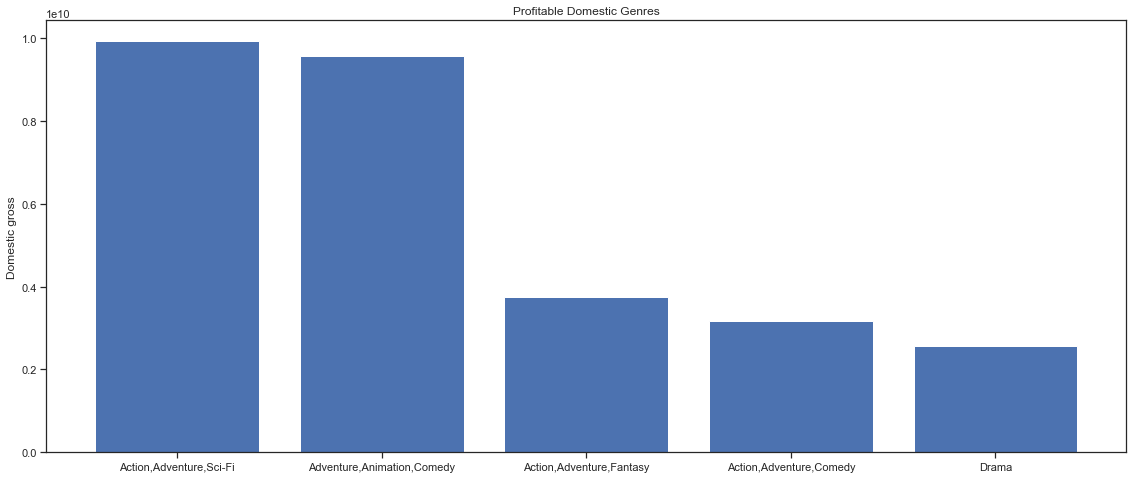

In [170]:
fig = plt.figure(figsize=(15,6,))
ax = fig.add_axes([0,0,1,1])
sorted_val = domestic_gross_sum.sort_values(by='domestic_gross', ascending=False).head(5)
genres = sorted_val['genres']
dgross = sorted_val['domestic_gross']
ax.bar(genres,dgross)

plt.ylabel('Domestic gross')
plt.title('Profitable Domestic Genres')

plt.savefig('Profitable_Domestic_Genres.png')

plt.show()

### We can see that (Action, Adventure, Sci-Fi) and (Action, Adventure, Comedy) are the most popular, domestically.

In [171]:
# calculating total income by adding domestic and foreign gross 
# grouped total income by genres
merged_genres_income['total_income']= merged_genres_income['domestic_gross'] + merged_genres_income['foreign_gross']
total_income_sum = merged_genres_income.groupby(["genres"]).total_income.sum().reset_index()

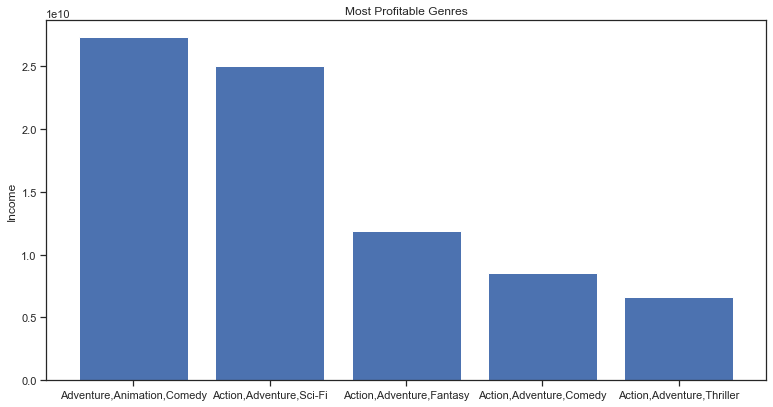

In [172]:
#showing the results
fig = plt.figure(figsize=(10,5,))
ax = fig.add_axes([0,0,1,1])
sorted_val = total_income_sum.sort_values(by='total_income', ascending=False).head(5)
genres = sorted_val['genres']
dgross = sorted_val['total_income']
ax.bar(genres,dgross)

plt.ylabel('Income')
plt.title('Most Profitable Genres')

plt.savefig('Profitable_Genres_Total.png')

plt.show()

### We can see that (Action, Adventure, Comedy) and (Action, Adventure, Sci-Fi) are doing the best

In [173]:
#merging "ratings" with our the dataframe so we can look at the rating and votes
ratings_merged_income = pd.merge(merged_genres_income, df_ratings, how='inner',
                                on='tconst')
ratings_merged_income.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,total_income,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",1.067000e+09,8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.283000e+08,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",7.526000e+08,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",6.985000e+08,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",6.239000e+08,7.0,657690


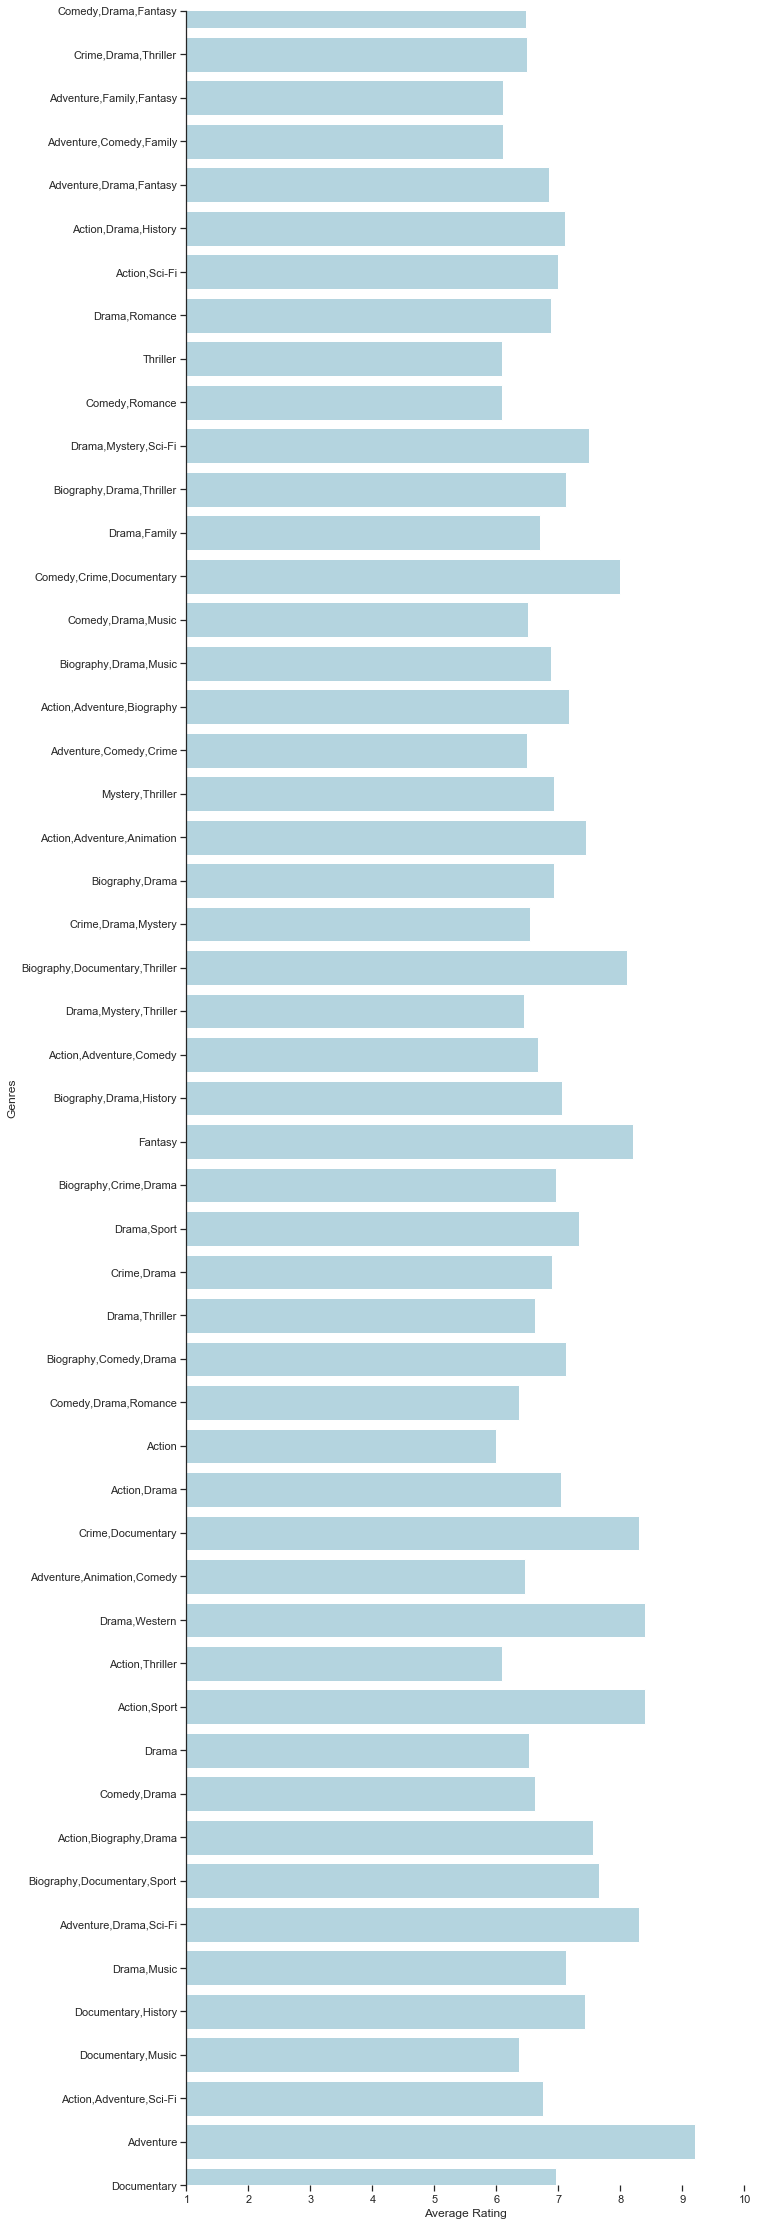

In [174]:
# Lets look at ratings in comparison to genres

f, ax = plt.subplots(figsize=(10, 40))

rate = ratings_merged_income.sort_values("averagerating", ascending=False)

splot1 = sns.barplot(x="averagerating", y="genres", data=rate,
            label="Genres", color="lightblue", orient='h', ci= None)

ax.set(ylim=(0, 50), xlim=(1, 10), ylabel="Genres",
       xlabel="Average Rating")
sns.despine(right=True, bottom=True)

plt.savefig('Average_Rating_Genres.png')

### checking runtime and ratings

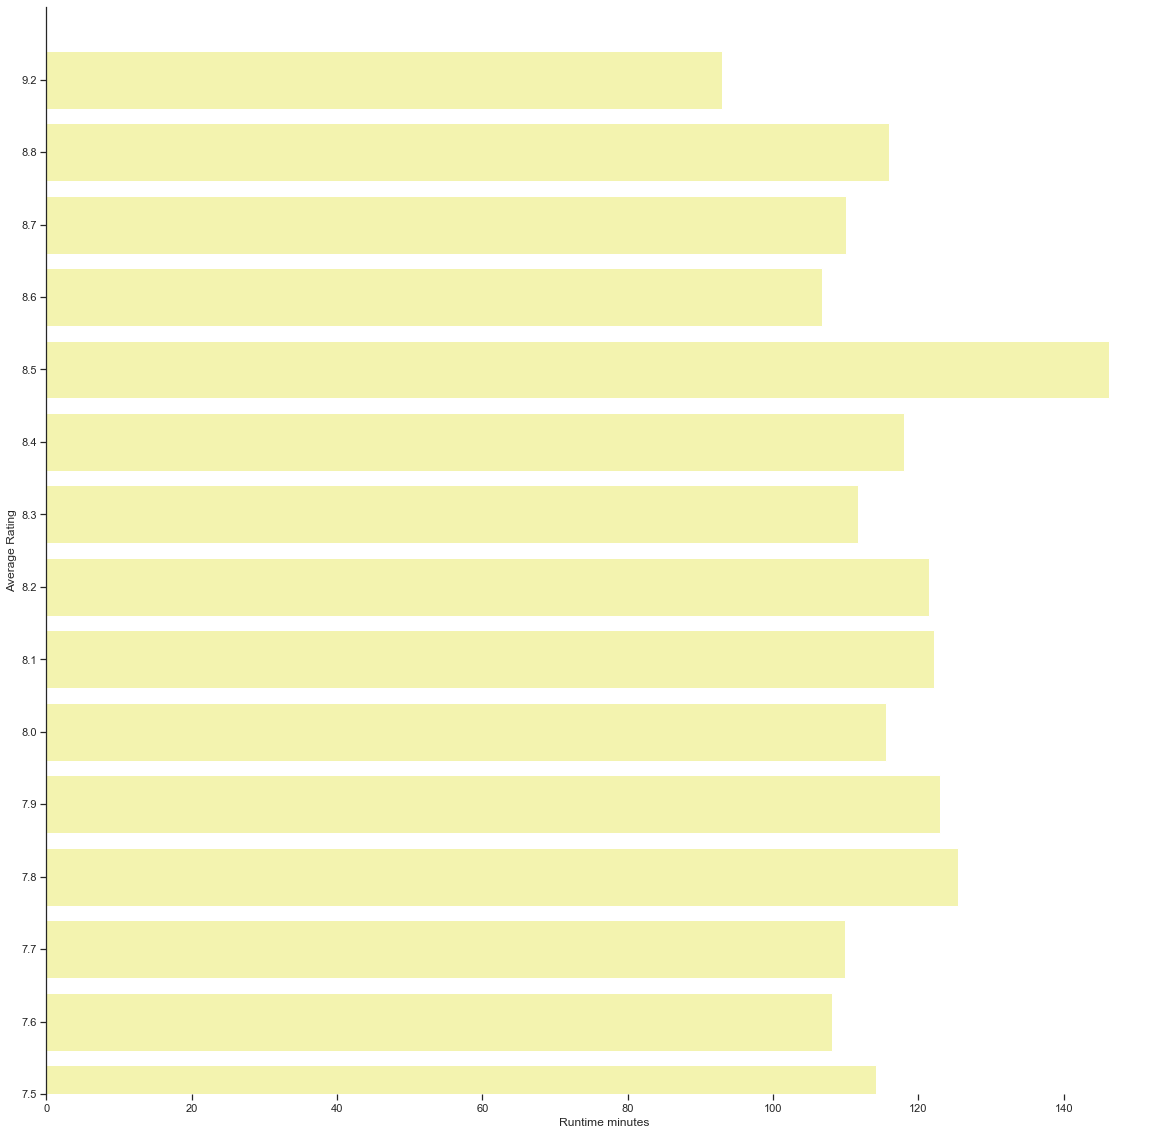

In [175]:
f, ax = plt.subplots(figsize=(20, 20))

above_7_5_rating = ratings_merged_income[ratings_merged_income["averagerating"
                                                            ] >= 7.5]

rates = above_7_5_rating.sort_values("averagerating", ascending=False)

sns.set_color_codes("pastel")
splot = sns.barplot(y="averagerating", x="runtime_minutes", data=rates,
             color="y", orient='h', ci =None)

ax.set(ylim=(0, 15),xlabel="Runtime minutes",
       ylabel="Average Rating")

sns.despine(right=True, bottom=True)

In [176]:
above_7_5_rating = ratings_merged_income[ratings_merged_income["averagerating"] >= 7.5]

In [177]:
without_duplicatetitles = ratings_merged_income[ratings_merged_income['title'
                    ].isin(ratings_merged_income[
                    ratings_merged_income.duplicated(['title'])]['title'])]
without_duplicatetitles.sort_values('title')
without_duplicatetitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 14 to 1498
Data columns (total 13 columns):
title              287 non-null object
studio             287 non-null object
domestic_gross     287 non-null float64
foreign_gross      287 non-null float64
year               287 non-null int64
tconst             287 non-null object
primary_title      287 non-null object
start_year         287 non-null int64
runtime_minutes    287 non-null float64
genres             287 non-null object
total_income       287 non-null float64
averagerating      287 non-null float64
numvotes           287 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 31.4+ KB


In [178]:
#The highest rated movies are from 100 to 130 minutes
above_7_5_rating['runtime_minutes'].describe()

count    206.000000
mean     116.247573
std       24.750302
min       44.000000
25%      101.250000
50%      115.000000
75%      132.000000
max      184.000000
Name: runtime_minutes, dtype: float64

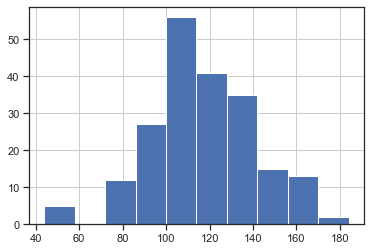

In [179]:
above_7_5_rating['runtime_minutes'].hist(bins=10)

plt.savefig('Runtime_Minutes_Rating.png')

In [180]:
movie_genres = above_7_5_rating.set_index('primary_title').genres.str.split(',', expand=True).stack().reset_index('primary_title')
movie_genres.columns = ['movie', 'genre']
movie_genres.head(50)

,movie,genre
0,Toy Story 3,Adventure
1,Toy Story 3,Animation
2,Toy Story 3,Comedy
0,Inception,Action
1,Inception,Adventure
2,Inception,Sci-Fi
0,Tangled,Adventure
1,Tangled,Animation
2,Tangled,Comedy
0,Despicable Me,Animation


In [181]:
profitability_genres = movie_genres.merge(df_budget, how='left', on='movie')

In [182]:
profitability_genres['net_income'].isna().value_counts()

False    411
True     100
Name: net_income, dtype: int64

In [183]:
profitability_genres = profitability_genres.dropna()
profitability_genres

,movie,genre,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI_worldwide,ROI_domestic,net_income,PB_ranges,profitable
0,Toy Story 3,Adventure,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09,2010.0,6.0,4.344398,1.075024,1.283884e+09,$90-100M,Yes
1,Toy Story 3,Animation,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09,2010.0,6.0,4.344398,1.075024,1.283884e+09,$90-100M,Yes
2,Toy Story 3,Comedy,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09,2010.0,6.0,4.344398,1.075024,1.283884e+09,$90-100M,Yes
3,Inception,Action,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08,2010.0,7.0,4.222029,0.828601,9.681008e+08,$90-100M,Yes
4,Inception,Adventure,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08,2010.0,7.0,4.222029,0.828601,9.681008e+08,$90-100M,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Kin,Drama,88.0,2018-08-31,30000000.0,5718096.0,1.009682e+07,2018.0,8.0,-0.663439,-0.809397,-1.418508e+07,$20-30M,No
505,Kin,Music,88.0,2018-08-31,30000000.0,5718096.0,1.009682e+07,2018.0,8.0,-0.663439,-0.809397,-1.418508e+07,$20-30M,No
508,Bilal: A New Breed of Hero,Action,100.0,2018-02-02,30000000.0,490973.0,6.485990e+05,2018.0,2.0,-0.978380,-0.983634,-2.886043e+07,$20-30M,No
509,Bilal: A New Breed of Hero,Adventure,100.0,2018-02-02,30000000.0,490973.0,6.485990e+05,2018.0,2.0,-0.978380,-0.983634,-2.886043e+07,$20-30M,No


In [184]:
# Ordering the genres by decending net income 

profitability_genres_mean = profitability_genres.groupby('genre'
                        ).net_income.agg('mean').reset_index().sort_values(
                                   'net_income', ascending=False).head(20)
profitability_genres_mean

,genre,net_income
1,Adventure,7.517231e+08
2,Animation,7.500228e+08
16,Sci-Fi,6.792098e+08
0,Action,6.300795e+08
9,Fantasy,5.976864e+08
8,Family,5.717314e+08
13,Musical,4.770057e+08
20,Western,4.506368e+08
4,Comedy,4.447857e+08
11,Horror,3.629580e+08


In [185]:
#Going to look at highly rated genres in a group now
seperated_genres_list = []
for genres in above_7_5_rating['genres']:
    seperated_genres_list.extend(genres.split(','))
    
unique_genres = list(set(seperated_genres_list))
unique_genres = [genre for genre in unique_genres if not genre == 'nan']

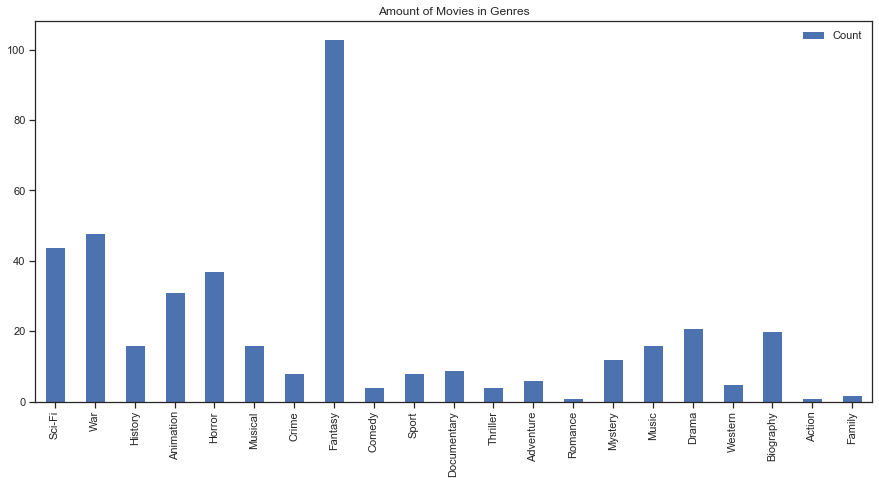

In [186]:
results = []
for genre in sorted(unique_genres):
    result = profitability_genres[profitability_genres['genre'].str.contains(genre)]['id'].count()
    results.append(result)

output = pd.DataFrame({'Count': results}, index=unique_genres)


fig, ax = plt.subplots(figsize=(15,7))
output.plot.bar(ax=ax)
ax.set_title('Amount of Movies in Genres')

plt.savefig('Amount_of_movies_genre.png')

plt.show()

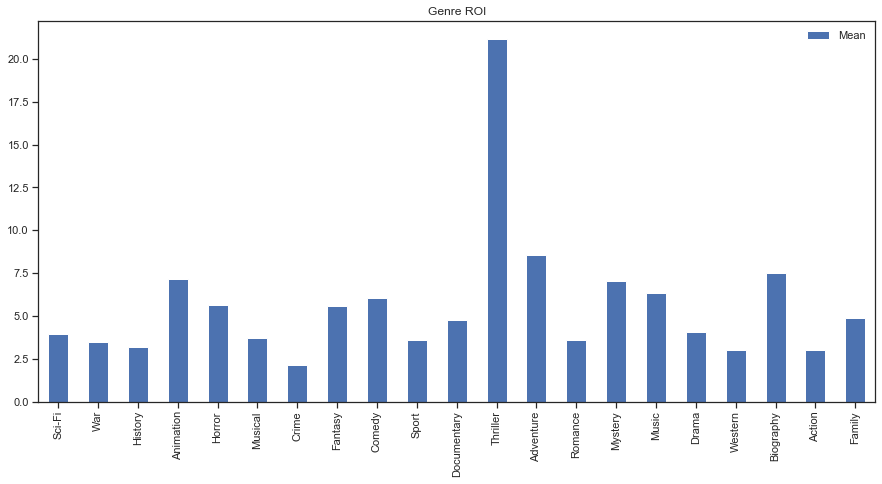

In [187]:
results = []
for genre in sorted(unique_genres):
    result = profitability_genres[profitability_genres['genre'].str.contains(genre)]['ROI_worldwide'].mean()
    results.append(result)

output = pd.DataFrame({'Mean': results}, index=unique_genres)


fig, ax = plt.subplots(figsize=(15,7))
output.plot.bar(ax=ax)
ax.set_title('Genre ROI')

plt.savefig('ROI_by_genre.png')

plt.show()

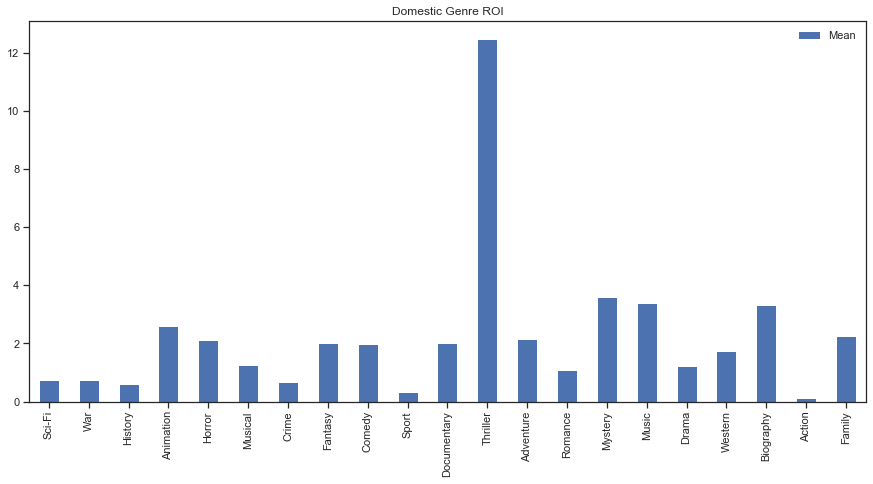

In [188]:
results = []
for genre in sorted(unique_genres):
    result = profitability_genres[profitability_genres['genre'].str.contains(genre)]['ROI_domestic'].mean()
    results.append(result)

output = pd.DataFrame({'Mean': results}, index=unique_genres)


fig, ax = plt.subplots(figsize=(15,7))
output.plot.bar(ax=ax)
ax.set_title('Domestic Genre ROI')

plt.savefig('Domestic_ROI_Genre.png')

plt.show()

### As we can see above the number of movies rated above 7.5 are more of "Thriller" genre 

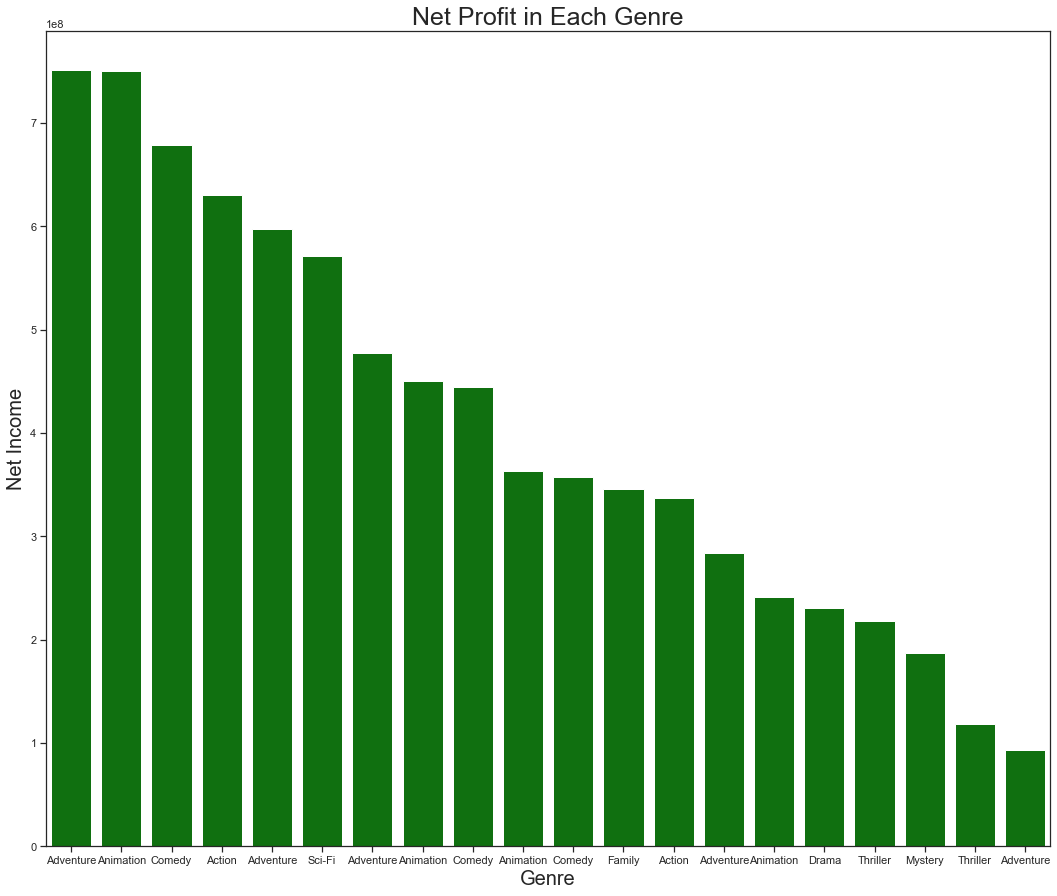

In [190]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.barplot(x="genre", y="net_income", data=profitability_genres_mean, color="green")

ax.set_xticklabels(profitability_genres['genre']
                  )
plt.title('Net Profit in Each Genre', fontsize=25)
ax.set_ylabel('Net Income', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)

plt.savefig('Net_Profit_genre.png')


### We can see that among highly rated movies Adventure, Animation and Comedy are the most profitable.

# Question 5
## Which Director has a profitable history?

A good director can make a huge difference and is one of the most important peices in the movies profit.
This code will determine who would be best fit for the job.

It appears here that the "NaN" entries under the 'job' column imply the primary director so we will drop all rows where "job" is not "NaN".

In [191]:
df_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [192]:
directors = df_principals.query("category == 'director'")
directors.head()

,tconst,ordering,nconst,category,job,characters
1,tt0111414,2,nm0398271,director,NaN,NaN
8,tt0323808,5,nm0362736,director,NaN,NaN
18,tt0417610,5,nm1145057,director,NaN,NaN
28,tt0469152,5,nm0707738,director,NaN,NaN
35,tt0473032,3,nm0776090,director,NaN,NaN


In [193]:
#most other values under "job" are assistant directors.
directors['job'].value_counts().head(10)

co-director               5796
collaborating director     576
segment director           241
documentary director       163
creative director           78
supervising director        58
series director             52
second director             39
chief director              36
lead director               33
Name: job, dtype: int64

In [194]:
#Dropping all rows where job is not "NaN".
directors = directors[directors['job'].isna()]
directors.head()

,tconst,ordering,nconst,category,job,characters
1,tt0111414,2,nm0398271,director,NaN,NaN
8,tt0323808,5,nm0362736,director,NaN,NaN
18,tt0417610,5,nm1145057,director,NaN,NaN
28,tt0469152,5,nm0707738,director,NaN,NaN
35,tt0473032,3,nm0776090,director,NaN,NaN


We will join our directors dataframe with our names dataframe so that we have the names.

In [195]:
directors_with_name = directors.merge(df_names, how='left', on='nconst')
directors_with_name.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
1,tt0323808,5,nm0362736,director,NaN,NaN,Robin Hardy,1929.0,2016.0,"actor,writer,director","tt0070917,tt0097375,tt0091032,tt0323808"
2,tt0417610,5,nm1145057,director,NaN,NaN,Alejandro Chomski,1968.0,NaN,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207"
3,tt0469152,5,nm0707738,director,NaN,NaN,Alyssa R. Bennett,1960.0,NaN,"producer,director,actress","tt4610944,tt5929400,tt4194608,tt9646364"
4,tt0473032,3,nm0776090,director,NaN,NaN,J. Neil Schulman,1953.0,NaN,"actor,writer,soundtrack","tt0088634,tt0473032,tt0783538,tt1667061"


In [196]:
directors_with_name_movie = directors_with_name.merge(df_title, how='left', on='tconst')
directors_with_name_movie.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",A Thin Life,A Thin Life,2018,75.0,Comedy
1,tt0323808,5,nm0362736,director,NaN,NaN,Robin Hardy,1929.0,2016.0,"actor,writer,director","tt0070917,tt0097375,tt0091032,tt0323808",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror"
2,tt0417610,5,nm1145057,director,NaN,NaN,Alejandro Chomski,1968.0,NaN,"director,writer,producer","tt3350042,tt6483054,tt0417610,tt0347207",Asleep in the Sun,Dormir al sol,2010,83.0,Fantasy
3,tt0469152,5,nm0707738,director,NaN,NaN,Alyssa R. Bennett,1960.0,NaN,"producer,director,actress","tt4610944,tt5929400,tt4194608,tt9646364",Smoking/Non-Smoking,The Pack,2011,84.0,Drama
4,tt0473032,3,nm0776090,director,NaN,NaN,J. Neil Schulman,1953.0,NaN,"actor,writer,soundtrack","tt0088634,tt0473032,tt0783538,tt1667061",Escape from Heaven,Escape from Heaven,2018,NaN,"Comedy,Fantasy"


Joining 'budget' dataframe with "directors_with_name" dataframe so we get the names and ROI

In [197]:
directors_profitability = df_budget.merge(directors_with_name_movie, how='inner', 
                                    left_on='movie',right_on='primary_title')
directors_profitability.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI_worldwide,ROI_domestic,...,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,5.532577,0.789430,...,Atsushi Wada,NaN,NaN,director,"tt1594549,tt1775309,tt1602612",Avatar,Abatâ,2011,93.0,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,1.546673,-0.412899,...,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,-0.572108,-0.877822,...,Simon Kinberg,1973.0,NaN,"producer,writer,director","tt1502712,tt3315342,tt1877832,tt3659388",Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,3.243841,0.388403,...,Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521",Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,4,5.827114,1.262718,...,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [198]:
directors_profitability_new= directors_profitability.rename(columns={"primary_name": "directors"})

In [199]:
total_profit_by_director_worldwide = directors_profitability_new.groupby('directors')['ROI_worldwide'].mean()
total_profit_by_director_domestic = directors_profitability_new.groupby('directors')['ROI_domestic'].mean()

In [200]:
top_10_directors_worldwide = total_profit_by_director_worldwide.sort_values(ascending=False).head(10)
top_10_directors_worldwide

directors
Travis Cluff          415.564740
Chris Lofing          415.564740
Sébastien Lifshitz    311.354312
Sujit Mondal          224.000000
Adnan A. Shaikh       224.000000
Karthik Chandan       123.277880
Paul Hendy            123.277880
Chris Stokes           94.576000
Levan Gabriadze        63.364198
Coodie                 62.119120
Name: ROI_worldwide, dtype: float64

In [202]:
top_10_directors_domestic = total_profit_by_director_domestic.sort_values(ascending=False).head(10)
top_10_directors_domestic

directors
Travis Cluff          226.644100
Chris Lofing          226.644100
Karthik Chandan       123.277880
Paul Hendy            123.277880
Sébastien Lifshitz    118.810023
Sujit Mondal          116.235147
Adnan A. Shaikh       116.235147
Chris Stokes           94.576000
Brandon Camp           62.119120
Chike Ozah             62.119120
Name: ROI_domestic, dtype: float64

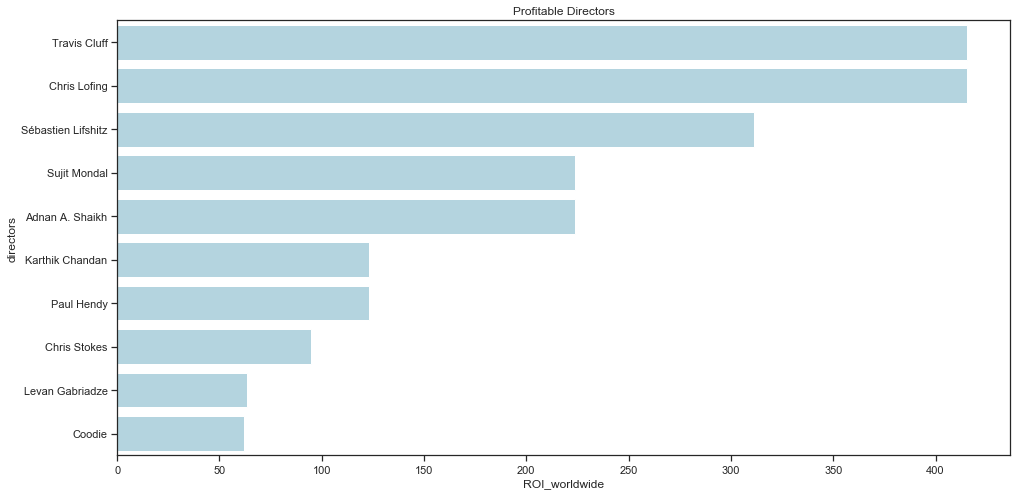

In [205]:
fig2, ax2 = plt.subplots(figsize=(16, 8))
plt.title('Profitable Directors')
plt.ylabel('Directors')
plt.xlabel('ROI_worldwide')
ax2.set(ylabel='Directors')
sns.barplot(top_10_directors_worldwide.values, top_10_directors_worldwide.index, color='lightblue')

plt.savefig('Profitable_Directors.png')


# Conclusion

Throughout my project of movie industry analysis the dataframes are explored to get answers 
to 5 questions I thought would be valuable to Microsoft and their stakeholders

   
- 2013-2015 was the peak of movie releases. I believe after 2015 producers were turning to a quality over quantity approach. Most viewers are becoming more critical, and an average movie just won't cut it anymore.


- June, July and August are the months with highest average return on investment.
- May June and July are the highest in average production budget. If you are planning on releasing a movie in the spring or summer, make sure to invest enough money to compete against the heavy hitters.


- There is positive correlation between popularity and production budget -- Net income and production budget. 
  Higher budget for production statistically brings in more profit. I guess whoever said "gotta spend money to make money" is right.
- Action, Adventure, Comedy and Action, Adventure, Sci-Fi are doing the best both domestically and in general.
  When we take genres above 7.5 rating we get Adventure, Animation, Action and Comedy are the most profitable genres.
- Most highly rated movies are from 100 to 130 minutes
- Top 2 directors are Travis Cluff and Chris Lofing.